In [1]:
import numpy as np

In [2]:
def trapzd(func, a, b, hstep, *args):
    """
    integration using trapezoidal scheme
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    hstep: float - step size to use
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - value of the integral estimated using trapezoidal integration    
    """
    bma = np.abs(b-a)
    nstep = np.int(bma / hstep) 
    if nstep == 1:
        return 0.5*(func(a, *args) + func(b, *args)) * hstep
    else: 
        xd = a + np.arange(nstep) * hstep # np.arange creates a vector of values from 0 to nstep-1
        return (0.5*(func(a, *args) + func(b, *args)) + np.sum(func(xd[1:], *args))) * hstep


In [3]:
def rom_int(func, a, b, hstep, *args):
    """
    integration using an efficent calculation of R1(h)
    
    Assumptions:
    -----------
    the # of sub-intervals of [a, b] is a power of 2
    func can take vectors, ../github-a211w20/not just scalars
    
    Parameters:
    -----------
    func: python function object - function to integrate
    a, b: floats - integration interval
    hstep: float - step size to use
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - value of the integral estimated using trapezoidal integration    
    """
    #TODO: check if our assumptions are met
    
    k = np.log2((2. * (b-a))/hstep)
    trap = trapzd(func, a, b, hstep, *args)
    vec1 = np.arange(1., (np.power(2., (k - 1.))+1))
    vec2 = a + ((2.*vec1) -1.) * (hstep / 2.)
    vec3 = np.sum(func(vec2, *args))
    return ((1./3.) * (trap + (2. * hstep * vec3)))

In [4]:
#This function is taken from notebook 02_integration_approximation.ipynb

def compute_integral(func, int_func, a, b, ns):
    nsteps = np.arange(ns) # generate a vector of nstep values from 0 to ns-1
    rom_int_value = np.zeros(np.shape(nsteps)[0]) # initialize a vector for integration results for each step size

    bma = b - a
    hsteps = bma / np.power(2., nsteps) # compute vector of corresponding step sizes
    for i, ns in enumerate(nsteps):
        rom_int_value[i] = int_func(func, a, b, hsteps[i]) # compute the integral for each step size
     
    return rom_int_value, hsteps # return vectors of integration results and step sizes0 

In [5]:
a = 0.; b = np.pi
ns = 10 

rom_int_val, hsteps = compute_integral(np.sin, rom_int, a, b, ns)
trap_int_val, hsteps = compute_integral(np.sin, trapzd, a, b, ns)

#trap_int_half_step, hsteps = compute_integral_half_step(np.sin, trapzd, a, b, ns)
#inefficent_rom_int = (1/3)*(4*trap_int_half_step - trap_int)

exact_int = np.cos(a)-np.cos(b)

ferr_rom = np.abs(rom_int_val/exact_int - 1.)
ferr_trap = np.abs(trap_int_val/exact_int - 1.)

#ferr_inefficent_rom = np.abs(inefficent_rom_int/exact_int - 1.)

In [6]:
#Plotting our results
import matplotlib.pylab as plt
%matplotlib inline

def plot_pretty(dpi=175,fontsize=9):
    # import pyplot and set some parameters to make plots prettier
    plt.rc("savefig", dpi=dpi)
    plt.rc("figure", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in') 
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5) 
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5) 
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    #if you don't have LaTeX installed on your laptop and this statement 
    # generates error, comment it out
    plt.rc('text', usetex=True)

    return

def plot_line_points(x, y, figsize=6, xlabel=' ', ylabel=' ', col= 'darkslateblue', 
                     xp = None, yp = None, points = False, pmarker='.', pcol='slateblue',
                     legend=None, plegend = None, legendloc='lower right', 
                     plot_title = None, grid=None, figsave = None):
    """
    A simple helper routine to make plots that involve a line and (optionally)
    a set of points, which was introduced and used during the first two weeks 
    of class.
    """
    plt.figure(figsize=(figsize,figsize))
    plt.xlabel(xlabel); plt.ylabel(ylabel)
    # Initialize minor ticks
    plt.minorticks_on()

    if legend:
        plt.plot(x, y, lw = 1., c=col, label = legend)
        if points: 
            if plegend:
                plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol, label=plegend)
            else:
                plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol)
        plt.legend(frameon=False, loc=legendloc, fontsize=3.*figsize)
    else:
        plt.plot(x, y, lw = 1., c=col)
        if points:
            plt.scatter(xp, yp, marker=pmarker, lw = 2., c=pcol)

    if plot_title:
        plt.title(plot_title, fontsize=3.*figsize)
        
    if grid: 
        plt.grid(linestyle='dotted', lw=0.5, color='lightgray')
        
    if figsave:
        plt.savefig(figsave, bbox_inches='tight')

    plt.show()


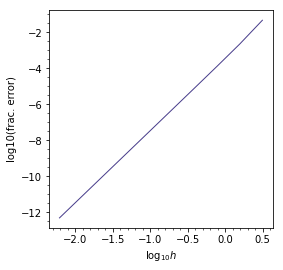

In [7]:
plot_line_points(np.log10(hsteps), np.log10(ferr_rom), xlabel=r'$\log_{10} h$',
                 ylabel=r'log10(frac. error)', figsize=4)

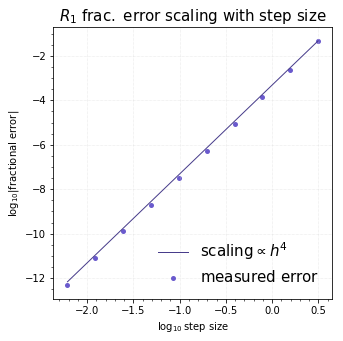

In [8]:

#model is ferr ~ h^n, we normalize it to the size of error for first step size in the sequence:
ferr_model = ferr_rom[0] * (hsteps/hsteps[0])**4

plot_line_points(np.log10(hsteps), np.log10(ferr_model), 
                 xlabel=r'$\log_{10}\,\rm step\ size$', ylabel = r'$\log_{10}\vert\rm fractional\ error\vert$',
                 xp=np.log10(hsteps), yp=np.log10(ferr_rom), points=True, 
                 legend=r'${\rm scaling} \propto h^4$', plegend = r'$\rm measured\ error$',
                 legendloc = 'lower right', 
                 plot_title=r'$R_1\ \rm frac.\ error\ scaling\ with\ step\ size$',
                 grid=True, figsize=5, figsave='fracerr_r1.pdf')

In [9]:
def abs_error_func(exact_val, approx_val):
    return (np.abs(approx_val - exact_val))

def rel_error_func(exact_val, approx_val):
    return (np.abs(1. - approx_val/exact_val))

In [10]:
def error_tol_rom_int(func, int_func1, int_func2, a, b, atol, rtol, *args):
    """
    find the largest step size that satisfies atol or rtol and calculate the integral
    using that step size
    
    NOTE: int_func1 should be more accurate (rhombering integration) 
    than int_func2 (trapezoid integration)
    
    Parameters:
    -----------
    func: python function object - function to integrate
    int_func1: python function object -- function that uses integration method #1, more accurate
    int_func2: python function object -- function that uses integration method #2, less accurate
    a, b: floats - integration interval
    atol: float - absolute error tolerance
    rtol: float - relative error tolerance
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - the romberg integral approximation that satisfies the given relative and absolute error values
    """
    
    hstep = np.abs(b-a) #Initial h-step value
    rom_int = int_func1(func, a, b, hstep, *args) #Initial Romberg integration approximation
    trap_int = int_func2(func, a, b, hstep, *args) #Initial trapezoind integration approximation
 
    abs_error = abs_error_func(rom_int, trap_int)
    rel_error = rel_error_func(rom_int, trap_int)

    #Finding the abs_error value that satisfies atol
    while (not abs_error < atol) and (not abs_error < rtol):
        hstep /= 2.
        rom_int = int_func1(func, a, b, hstep, *args)
        trap_int = int_func2(func, a, b, hstep, *args)
        abs_error = abs_error_func(rom_int, trap_int)
        rel_error = rel_error_func(rom_int, trap_int)

    print(hstep)
    return (int_func1(func, a, b, hstep, *args))


In [11]:
error_tol_rom_int(np.sin, rom_int, trapzd, a, b, 10e-100, 10e-15)

1.8725351414619643e-07


2.0000000000000036

In [12]:
def _dc(z1, z2, hstep, *args):
    """
    helper function to compute D_c from z1 to z2 by numerical integration using trapzd
    
    Parameters: 
    -----------
    z1, z2: floats = redshift integration limits
    hstep: float = step size for trapezoidal integration
    *args: pointer to argument list to pass to dl_func
    
    Returns:
    --------
    float - value of the integral estimated using trapezoidal integration
    """
    return trapzd(dl_func, z1, z2, hstep, *args)

In [138]:
def d_L(z, H0, Om0, OmL, hstep=1.e-8):
    """
    routine computing luminosity distance from z=0 to z 
    using helper routine for comoving distance _dc
    
    Parameters:
    -----------
    z: float - redshift to which to compute d_L
    H0: float - Hubble constant in units of km/s/Mpc
    Om0: float - dimensionless mean matter density in the universe, >= 0
    OmL: float - dimensionless mean vacuum energy density in the universe
    hstep: float - step size to use
     
    Returns:
    --------
    float - value of d_L(z, H0, Om0, OmL) 
            estimated using trapezoidal integration with step size hstep 
    """
    if 1.0+OmL == 1.0: # note that I exploit the roundoff error in testing whether OmL is consistent with zero
        return d_L_simple(z, H0, Om0) # if OmL=0, use simple formula without integration
    else: # otherwise use numerical integration to compute distance 
        dH = clight / H0 
        Omk = 1.0 - Om0 - OmL
        args = [H0, Om0, OmL, Omk]
        dc = _dc(0., z, hstep, *args)
        if 1.0 + Omk == 1.0:
            return dH * dc * (1.0 + z)
        else:
            sqrOmk = np.sqrt(np.abs(Omk))
            if Omk > 0.:
                return dH * np.sinh(dc*sqrOmk) * (1.0 + z) / sqrOmk 
            else:
                return dH * np.sin(dc*sqrOmk) * (1.0 + z) / sqrOmk
            
        return dL

In [6]:
H0, Om0, OmL = 70., 0.3, 0.7;
z = 2.0

hstep = 1.e-6

dLtrap    = d_L(z, H0, Om0, OmL, hstep=hstep)

print("d_L(z=%.2f, Om0=%.2f, OmL=%.2f, H0=%.1f) = %.4g Mpc"%(z, Om0, OmL, H0, dLtrap))


d_L(z=2.00, Om0=0.30, OmL=0.70, H0=70.0) = 1.554e+04 Mpc
